<a href="https://colab.research.google.com/github/dschirmerii/Complete-Python-3-Bootcamp/blob/master/comparemodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libaries
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import History
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import tensorflow as tf
import os
import numpy as np
import shutil

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Mon Aug  2 18:43:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    29W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
rootdir= '/MyDrive/Project 2/aaplcandles/' #path of the original folder
classes = ['buy','sell']

In [6]:
cd drive/MyDrive/Project 2

/content/drive/MyDrive/Project 2


In [7]:
cd output

/content/drive/MyDrive/Project 2/output


In [8]:
target_size=(64,64)
batch_size=6

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
) # set validation split

train_generator = train_datagen.flow_from_directory(
    "./train",
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    "./val", # same directory as training data
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 799 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [10]:
steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size

In [16]:
def build_compile(optimizer_name='SGD'):
    
    
  model = Sequential([Conv2D(input_shape=(64,64,1),filters=(3),kernel_size=(1,1),activation='relu'),
     keras.layers.MaxPooling2D(pool_size=(2,2)) ,
     Dropout(0.2),
     Flatten(), # flatten out the layers
     Dense(32,activation='relu'),
     Dense(2,activation = 'softmax')
    ])
  

    # compile the model with a cross-entropy loss and specify the given optimizer
  model.compile(optimizer=optimizer_name, loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
  return model

In [12]:
optimizer_names = ['SGD','Adagrad','Adam']
optimizer_list = ['SGD','Adagrad','Adam']

In [18]:
hist_acc = []
hist_val_acc = []

# Iterate over optimizers and train the network, using x_test and y_test as a validation set in each epoch
for item,name in zip(optimizer_list, optimizer_names):
    print("-----------------------------")
    print("Doing %s optimizer" %str(name))
    print("-----------------------------")
    
    # Get the model from our function above
    model = build_compile(item)
    
    # Train the model
    hist = model.fit(train_generator,batch_size=6,steps_per_epoch=10, validation_data=validation_generator, validation_steps=6,epochs=25)
    # Store the performance
    hist_acc.append(hist.history['accuracy'])
    hist_val_acc.append(hist.history['loss'])
    print("-----------------------------")

-----------------------------
Doing SGD optimizer
-----------------------------
Epoch 1/25
10/10 [==============================] - 2s 113ms/step - loss: 0.6928 - accuracy: 0.6127
Epoch 2/25
10/10 [==============================] - 2s 170ms/step - loss: 0.6951 - accuracy: 0.3396
Epoch 3/25
10/10 [==============================] - 1s 60ms/step - loss: 0.6934 - accuracy: 0.4801
Epoch 4/25
10/10 [==============================] - 1s 108ms/step - loss: 0.6924 - accuracy: 0.6122
Epoch 5/25
10/10 [==============================] - 1s 67ms/step - loss: 0.6938 - accuracy: 0.4705
Epoch 6/25
10/10 [==============================] - 1s 60ms/step - loss: 0.6914 - accuracy: 0.5858
Epoch 7/25
10/10 [==============================] - 1s 149ms/step - loss: 0.6933 - accuracy: 0.4957
Epoch 8/25
10/10 [==============================] - 1s 63ms/step - loss: 0.6859 - accuracy: 0.6517
Epoch 9/25
10/10 [==============================] - 1s 108ms/step - loss: 0.6998 - accuracy: 0.3917
Epoch 10/25
10/10 [=====

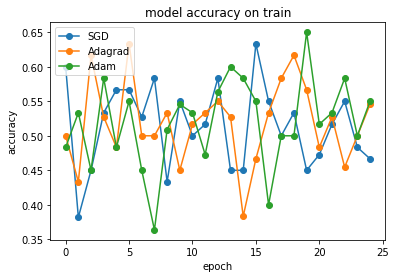

In [19]:
for i in range(len(optimizer_list)):
    plt.plot(hist_acc[i],'-o',label=str(optimizer_names[i]))
plt.title('model accuracy on train')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

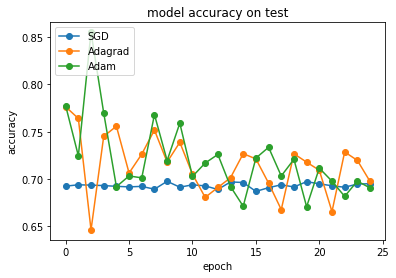

In [20]:
# summarize history for accuracy on test set
for i in range(len(optimizer_list)):
    plt.plot(hist_val_acc[i],'-o', label=str(optimizer_names[i]))
plt.title('model accuracy on test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

In [21]:
nepochs = 50

In [22]:
# Implement formula (15)
initial_learning_rate = 0.01
epochs = nepochs
decay = initial_learning_rate / epochs

def lr_time_based_decay(epoch, lr):
    return initial_learning_rate * 1 / (1 + decay * epoch)

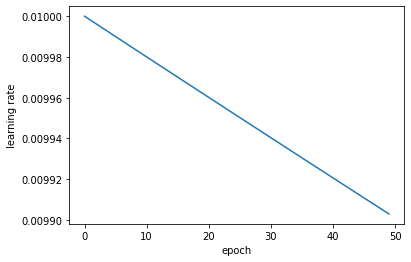

In [23]:
# Plot the learning rate as a function of the number of epochs
plt.plot(lr_time_based_decay(np.arange(0,nepochs),0.01))
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.show()

In [24]:
model = build_compile()
history_time_based_decay = model.fit(
    train_generator,  
    epochs=nepochs, 
    batch_size=32,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_time_based_decay, verbose=1)], validation_data=(validation_generator))

Epoch 1/50

Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.
134/134 [==============================] - 9s 60ms/step - loss: 0.6938 - accuracy: 0.4940
Epoch 2/50

Epoch 00002: LearningRateScheduler reducing learning rate to 0.009998000399920017.
134/134 [==============================] - 8s 59ms/step - loss: 0.6902 - accuracy: 0.5422
Epoch 3/50

Epoch 00003: LearningRateScheduler reducing learning rate to 0.009996001599360257.
134/134 [==============================] - 8s 59ms/step - loss: 0.6906 - accuracy: 0.5388
Epoch 4/50

Epoch 00004: LearningRateScheduler reducing learning rate to 0.009994003597841297.
134/134 [==============================] - 8s 57ms/step - loss: 0.6951 - accuracy: 0.5124
Epoch 5/50

Epoch 00005: LearningRateScheduler reducing learning rate to 0.009992006394884094.
134/134 [==============================] - 8s 57ms/step - loss: 0.6840 - accuracy: 0.5720
Epoch 6/50

Epoch 00006: LearningRateScheduler reducing learning rate to 0.0099900099900099

In [25]:
# Implement formula (16)
initial_learning_rate = 0.01
def lr_step_decay(epoch, lr):
    drop_rate = 0.5
    epochs_drop = 10.0
    return initial_learning_rate * np.power(drop_rate, np.floor(epoch/epochs_drop))

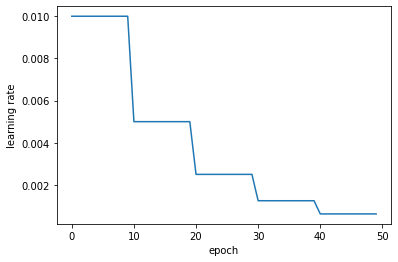

In [26]:
# Plot the learning rate as a function of the number of epochs
plt.plot(lr_step_decay(np.arange(0,nepochs),0.01))
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.show()

In [27]:
model = build_compile()
history_step_decay = model.fit(
    train_generator, 
    epochs=nepochs, 
    batch_size=32,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_step_decay, verbose=1)], validation_data=(validation_generator))

Epoch 1/50

Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.
134/134 [==============================] - 9s 59ms/step - loss: 0.7537 - accuracy: 0.5083
Epoch 2/50

Epoch 00002: LearningRateScheduler reducing learning rate to 0.01.
134/134 [==============================] - 8s 60ms/step - loss: 0.6929 - accuracy: 0.5407
Epoch 3/50

Epoch 00003: LearningRateScheduler reducing learning rate to 0.01.
134/134 [==============================] - 8s 61ms/step - loss: 0.6876 - accuracy: 0.5765
Epoch 4/50

Epoch 00004: LearningRateScheduler reducing learning rate to 0.01.
134/134 [==============================] - 8s 63ms/step - loss: 0.6918 - accuracy: 0.5293
Epoch 5/50

Epoch 00005: LearningRateScheduler reducing learning rate to 0.01.
134/134 [==============================] - 8s 61ms/step - loss: 0.6890 - accuracy: 0.5682
Epoch 6/50

Epoch 00006: LearningRateScheduler reducing learning rate to 0.01.
134/134 [==============================] - 8s 60ms/step - loss: 0.6895 - acc

In [28]:
# Implement formula (17)
initial_learning_rate = 0.01
def lr_exp_decay(epoch, lr):
    k = 0.1
    return initial_learning_rate * np.exp(-k*epoch)

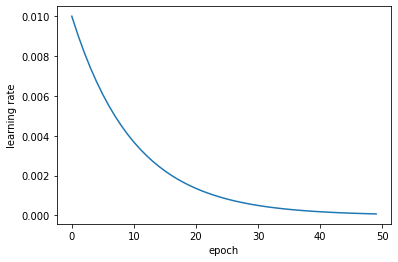

In [29]:
# Plot the learning rate as a function of the number of epochs
plt.plot(lr_exp_decay(np.arange(0,nepochs),0.01))
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.show()

In [30]:
# Train the network with the learning rate schedule
model = build_compile()
history_exp_decay = model.fit(
    train_generator, 
    epochs=nepochs, 
    batch_size=32,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_exp_decay, verbose=1)], validation_data=(validation_generator))

Epoch 1/50

Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.
134/134 [==============================] - 8s 58ms/step - loss: 0.6937 - accuracy: 0.5256
Epoch 2/50

Epoch 00002: LearningRateScheduler reducing learning rate to 0.009048374180359595.
134/134 [==============================] - 8s 58ms/step - loss: 0.6876 - accuracy: 0.5681
Epoch 3/50

Epoch 00003: LearningRateScheduler reducing learning rate to 0.008187307530779819.
134/134 [==============================] - 8s 58ms/step - loss: 0.6923 - accuracy: 0.5378
Epoch 4/50

Epoch 00004: LearningRateScheduler reducing learning rate to 0.007408182206817179.
134/134 [==============================] - 8s 58ms/step - loss: 0.6885 - accuracy: 0.5589
Epoch 5/50

Epoch 00005: LearningRateScheduler reducing learning rate to 0.006703200460356393.
134/134 [==============================] - 8s 61ms/step - loss: 0.6889 - accuracy: 0.5508
Epoch 6/50

Epoch 00006: LearningRateScheduler reducing learning rate to 0.0060653065971263

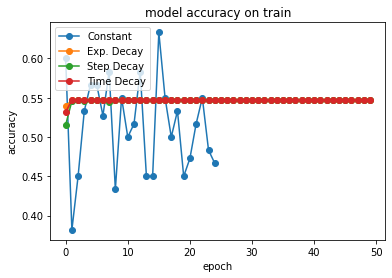

In [31]:
# summarize history for accuracy
plt.plot(hist_acc[0],'-o',label='Constant')
plt.plot(history_exp_decay.history['accuracy'],'-o', label="Exp. Decay")
plt.plot(history_step_decay.history['accuracy'],'-o', label="Step Decay")
plt.plot(history_time_based_decay.history['accuracy'],'-o', label="Time Decay")
plt.title('model accuracy on train')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

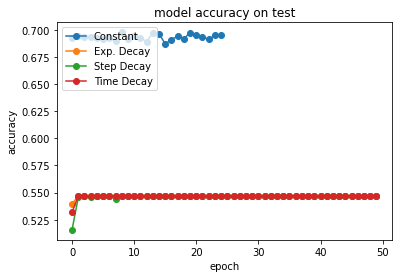

In [33]:
# summarize history for accuracy
plt.plot(hist_val_acc[0],'-o',label='Constant')
plt.plot(history_exp_decay.history['accuracy'],'-o', label="Exp. Decay")
plt.plot(history_step_decay.history['accuracy'],'-o', label="Step Decay")
plt.plot(history_time_based_decay.history['accuracy'],'-o', label="Time Decay")
plt.title('model accuracy on test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()


In [41]:
# Build the model with an L2 regularization added to all weights
model_l2 = Sequential([Conv2D(input_shape=(64,64,1),filters=(3),kernel_size=(1,1),activation='relu'),
     keras.layers.MaxPooling2D(pool_size=(2,2)),
     Flatten(),
     keras.layers.Dense(64, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
     keras.layers.Dense(1,activation ='softmax')])
# model_l2 = keras.Sequential([keras.layers.Flatten(input_shape=(64,64,1)), 
#                       keras.layers.Dense(128, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
#                       keras.layers.Dense(1, activation='softmax',kernel_regularizer=keras.regularizers.l2(0.001))])

# Compile the model and optimize with adam
model_l2.compile(optimizer='Adam', loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [35]:
model_l2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 64, 64, 3)         6         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 129       
Total params: 393,479
Trainable params: 393,479
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Fit the model to the data while providing a validation set for each epoch
history_l2 = model_l2.fit(train_generator, epochs=50, batch_size=32, validation_data=(validation_generator))

Epoch 1/50


InvalidArgumentError: ignored

In [ ]:
# Build the model with early stopping
model_es = keras.Sequential([keras.layers.Flatten(input_shape=(64,64,1)), 
                      keras.layers.Dense(128, activation='relu'),
                      keras.layers.Dense(10, activation='softmax')])

# Compile the model and optimize with adam
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model_es.compile(optimizer='Adam', loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
# Fit the model to the data while providing a validation set for each epoch
history_es = model_es.fit(train_generator, epochs=50, batch_size=32, validation_data=(validation_generator), callbacks=[es])

In [ ]:
# Build the model with dropout
model_dropout = keras.Sequential([keras.layers.Flatten(input_shape=(64, 64,1)), 
                      keras.layers.Dense(128, activation='relu'),
                      keras.layers.Dropout(.2),
                      keras.layers.Dense(10, activation='softmax'),
                      keras.layers.Dropout(.2)])

# Compile the model and optimize with adam
model_dropout.compile(optimizer='Adam', loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
# Fit the model to the data while providing a validation set for each epoch
history_dropout = model_dropout.fit(train_generator, epochs=50, batch_size=32, validation_data=(validation_generator))

In [ ]:
# summarize history for accuracy
plt.plot(hist_val_acc[0],'-o', label='Standard')
plt.plot(history_l2.history['val_acc'],'-o', label="L2")
plt.plot(history_es.history['val_acc'],'-o', label="Early Stopping")
plt.plot(history_dropout.history['val_acc'],'-o', label="Dropout")
plt.title('model accuracy on test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()